In [5]:
#step 1: Define the objective ofthe problem statement
# create classification model which can classify the flower
# species based on the input provided SL,SW,PL,PW
# step 2 : Data gathering 




In [6]:
#import lib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import KNN and accuracy_accuracy_score from sklern
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [7]:
#read data set
df=pd.read_csv("D:/DSCT/Dataset/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
#Step 3: data preperation
# Not reqd in this project

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
#there are total 150 values in data set
# no missing value

# step 4 : Exploratory Data Analysis

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
#no null value

In [14]:
data=df.drop_duplicates(subset='species')

In [15]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [16]:
# 3 species is in data set


In [17]:
df.value_counts('species')

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [18]:
# each species has 50 value
# equal ammount of row for each species

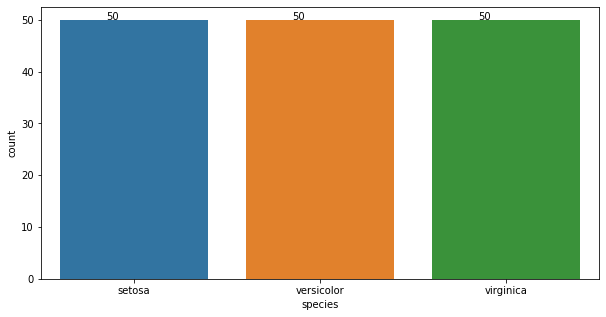

In [19]:
plt.figure(figsize=(10,5))
a=sns.countplot(x='species',data=df)
for p in a.patches:
    a.annotate('{}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))

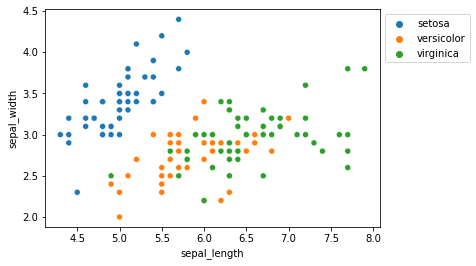

In [20]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=df)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [21]:
# setosa has small sepal length but large sepal width
# versicolor has sepal length and sepal width inbetween setosa and virginica
# virginica has largest sepal length but small sepal width


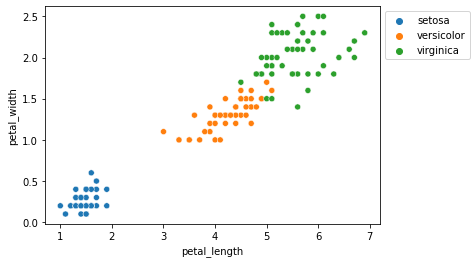

In [22]:
sns.scatterplot(x='petal_length',y='petal_width',hue='species',data=df)
plt.legend(bbox_to_anchor=(1,1),loc=2)

In [23]:
# setosa has smallest petal length and width
# versicolor has lies inbetween setosa and virginica for petal lenght and width
# virginica has largest petal length and width

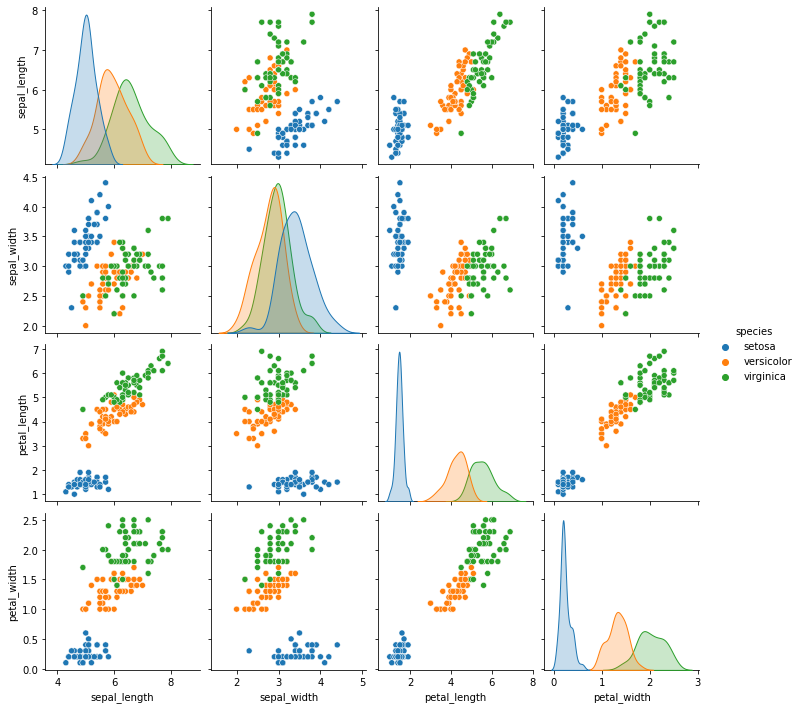

In [24]:
sns.pairplot(df,hue='species')

<AxesSubplot:>

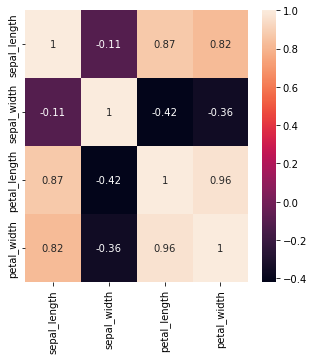

In [25]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)

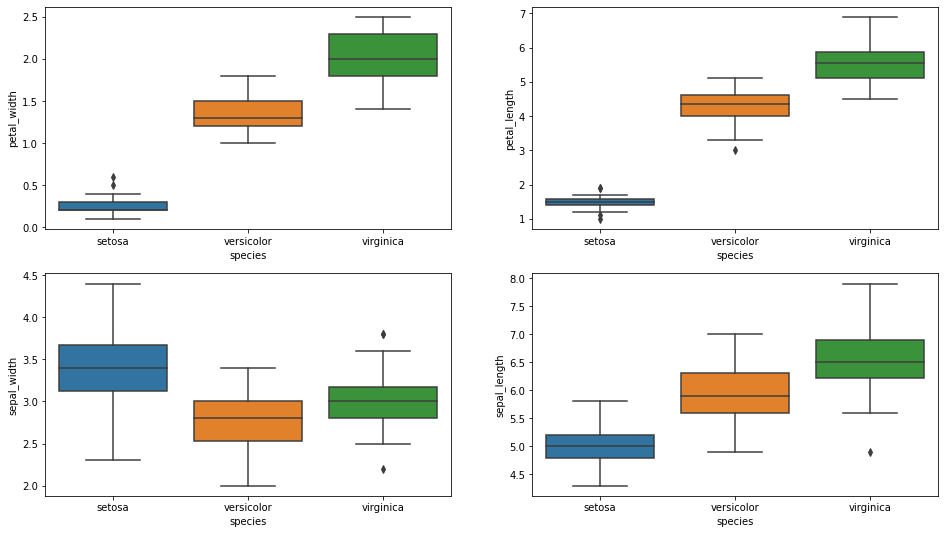

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(x="species", y="petal_width", data=df, orient="v", ax=axes[0,0])
sns.boxplot(x="species", y="petal_length", data=df, orient="v", ax=axes[0,1])
sns.boxplot(x="species", y="sepal_width", data=df, orient="v", ax=axes[1,0])
sns.boxplot(x="species", y="sepal_length", data=df, orient="v", ax=axes[1,1])
plt.show()

In [27]:
#split data into x and y
# x=SL,SW,PL,PW
# y=species

In [28]:
X=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['species']

In [29]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [31]:
# split data into traning and testing
# train_test_split

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [33]:
print("X_train:-",X_train.shape)
print("X_test:-",X_test.shape)
print("y_train:-",y_train.shape)
print("y_test:-",y_test.shape)

X_train:- (105, 4)
X_test:- (45, 4)
y_train:- (105,)
y_test:- (45,)


# Step 5:Building a machine learning model

In [34]:
# create a model k=3,distance=manhatten_distance
ML_model=KNeighborsClassifier(n_neighbors=3,p=1)
print("model created")

#model traning
ML_model.fit(X_train,y_train)
print("model traning completed")

#find t y_pred
y_pred=ML_model.predict(X_test)
print("y_pred completed")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("ACC for =3:-",acc*100)


model created
model traning completed
y_pred completed
ACC for =3:- 93.33333333333333


In [35]:
#create model for k=3, distance =Eucliden_distance
ML_model=KNeighborsClassifier(n_neighbors=3,p=2)

ML_model.fit(X_train,y_train)

y_pred=ML_model.predict(X_test)

acc=accuracy_score(y_test,y_pred)
print("ACC for =3:-",acc*100)

ACC for =3:- 95.55555555555556


In [36]:
#create model for k=5, distance =Eucliden_distance
ML_model=KNeighborsClassifier(n_neighbors=5,p=2)
ML_model.fit(X_train,y_train)
y_pred=ML_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print("ACC for =5:-",acc*100)

ACC for =5:- 95.55555555555556


In [37]:
for x in range(len(y_pred)):
    if list(y_test)[x]!=list(y_pred)[x]:
        
        print(list(y_test)[x]," : ",list(y_pred)[x])

versicolor  :  virginica
versicolor  :  virginica


## step 6: Model Evaluation & Optimization finding Kvalue in KNN

In [38]:
# creat model k=1,3,5....29
accuracy=[]

for k in range(1,30,2):
    #create model
    ML_model=KNeighborsClassifier(n_neighbors=k)
    #Model train
    ML_model.fit(X_train,y_train)
    #find y_pred
    y_pred=ML_model.predict(X_test)
    #find accuracy
    acc=accuracy_score(y_test,y_pred)
    accuracy.append(acc)

In [39]:
accuracy

[0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333]

Text(0, 0.5, 'Accuracy')

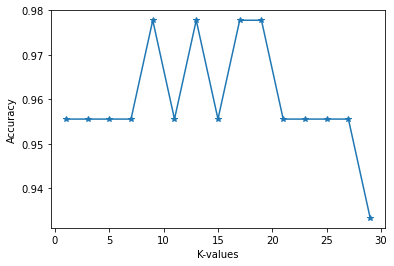

In [40]:
plt.plot(list(range(1,30,2)),accuracy,'-*')
plt.xlabel("K-values")
plt.ylabel("Accuracy")

In [41]:
# from above graph k=9, 13 17 19 having good accuracy score
# so k=9 is best values for iris dataset

In [42]:
# create a model k=9,distance=manhatten_distance
ML_model=KNeighborsClassifier(n_neighbors=9,p=1)
print("model created")

#model traning
ML_model.fit(X_train,y_train)
print("model traning completed")

#find t y_pred
y_pred=ML_model.predict(X_test)
print("y_pred completed")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("ACC for =9:-",acc*100)


model created
model traning completed
y_pred completed
ACC for =9:- 97.77777777777777



# Prediction 

In [43]:
# SL=float(input("Enter SL:- "))
# SW=float(input("Enter SW:- "))
# PL=float(input("Enter PL:- "))
# PW=float(input("Enter PW:- "))

In [44]:
# pred=ML_model.predict([[SL,SW,PL,PW]])[0]
# print("for SL={},SW={},PL={},PW={} flower species is {}".format(SL,SW,PL,PW,pred))

# save the Model

In [45]:
import joblib
joblib.dump(ML_model,"KNN_Iris_Model.pkl")
print("saved")

saved


# Model Eval Parameter

In [46]:
# Accuracy and ER
from sklearn import metrics
acc=accuracy_score(y_test,y_pred)
print("Accuracy :-",acc)
print("Error rate :-",1-acc)

Accuracy :- 0.9777777777777777
Error rate :- 0.022222222222222254


[[17  0  0]
 [ 0 13  1]
 [ 0  0 14]]


Text(69.0, 0.5, 'Actual')

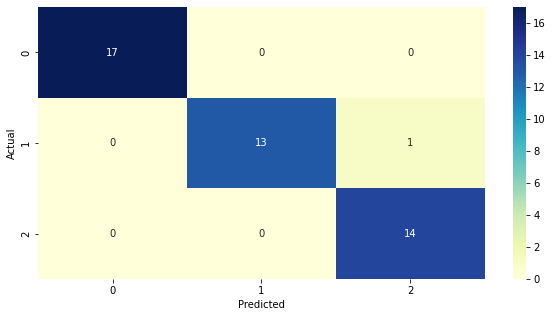

In [47]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(10,5))

sns.heatmap(cm,annot=True,cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel("Actual")

In [48]:
from sklearn.metrics import classification_report
lab=['setosa', 'versicolor', 'virginica']
print(classification_report(y_test,y_pred,target_names=lab))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.93      0.96        14
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [49]:
from sklearn.metrics import precision_score,recall_score,f1_score
print("Precision:-",precision_score(y_test,y_pred,average='weighted'))
print("Recall:- ",recall_score(y_test,y_pred,average='weighted'))
print("F1 score :- ",f1_score(y_test,y_pred,average='weighted'))

Precision:- 0.9792592592592592
Recall:-  0.9777777777777777
F1 score :-  0.9777493969064851


Accuracy :- 0.9777777777777777
Error rate :- 0.022222222222222254
Precision:- 0.9792592592592592
Recall:-  0.9777777777777777
F1 score :-  0.9777493969064851
[[17  0  0]
 [ 0 13  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.93      0.96        14
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



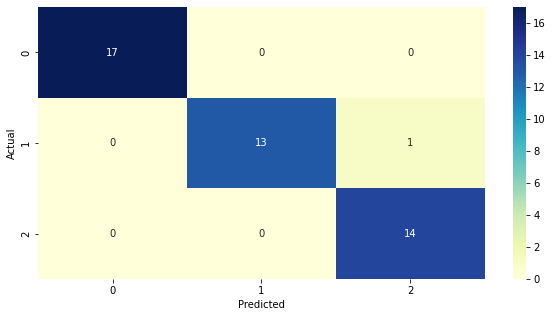

In [50]:
# final eval parameter fro use in any project

# Accuracy and ER
from sklearn.metrics import precision_score,recall_score,f1_score
acc=accuracy_score(y_test,y_pred)
print("Accuracy :-",acc)
print("Error rate :-",1-acc)
print("Precision:-",precision_score(y_test,y_pred,average='weighted'))
print("Recall:- ",recall_score(y_test,y_pred,average='weighted'))
print("F1 score :- ",f1_score(y_test,y_pred,average='weighted'))

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(10,5))

sns.heatmap(cm,annot=True,cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel("Actual")

from sklearn.metrics import classification_report
lab=['setosa', 'versicolor', 'virginica']
print(classification_report(y_test,y_pred,target_names=lab))

In [51]:
#Model_Eval Fun

from sklearn.metrics import precision_score,recall_score,f1_score
def model_Eval(y_test,y_pred):

    acc=accuracy_score(y_test,y_pred)
    print("Accuracy :-",acc)
    print("Error rate :-",1-acc)
    print("Precision:-",precision_score(y_test,y_pred,average='weighted'))
    print("Recall:- ",recall_score(y_test,y_pred,average='weighted'))
    print("F1 score :- ",f1_score(y_test,y_pred,average='weighted'))

    #Confusion matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    plt.figure(figsize=(10,5))

    sns.heatmap(cm,annot=True,cmap="YlGnBu")
    plt.xlabel('Predicted')
    plt.ylabel("Actual")



Accuracy :- 0.9777777777777777
Error rate :- 0.022222222222222254
Precision:- 0.9792592592592592
Recall:-  0.9777777777777777
F1 score :-  0.9777493969064851
[[17  0  0]
 [ 0 13  1]
 [ 0  0 14]]


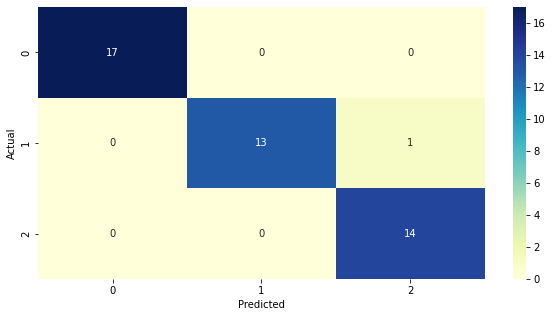

In [52]:
model_Eval(y_test,y_pred)